In [1]:
from sklearn.datasets import fetch_olivetti_faces

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = fetch_olivetti_faces()

In [4]:
targets = data.target

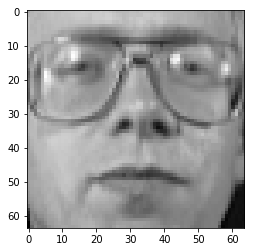

In [12]:
plt.imshow(data.images[11], cmap='gray')

In [13]:
data.data.shape

(400, 4096)

In [20]:
train = data.data[targets < 30]
test = data.data[targets >= 30]

In [21]:
train.shape

(300, 4096)

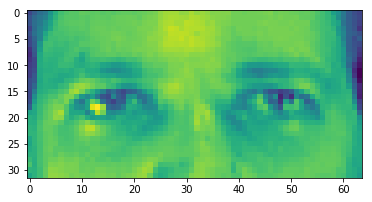

In [27]:
plt.imshow(train[0][:2048].reshape(32,64))

In [32]:
trainX = train[:,:2048]

In [33]:
trainY = train[:,2048:]

In [34]:
testX = test[:,:2048]

In [35]:
testY = test[:,2048:]

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [37]:
nn_r = KNeighborsRegressor()

In [38]:
nn_r.fit(trainX,trainY)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [48]:
sample = testX[::10]

In [49]:
res = nn_r.predict(sample)

In [50]:
res.shape

(10, 2048)

In [52]:
final = np.hstack([sample,res])

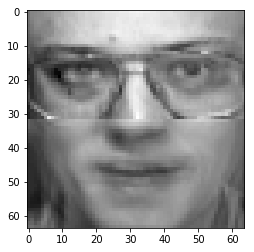

In [56]:
plt.imshow(final[0].reshape(64,64), cmap='gray')

In [57]:
train[0].shape

(4096,)

In [70]:
trainX = data.images[:300,:,:32]
testX = data.images[300:,:,:32]

In [71]:
trainY = data.images[:300,:,32:]
testY = data.images[300:,:,32:]

In [72]:
nn = KNeighborsRegressor()

In [76]:
trainX.reshape(-1,64*32).shape

(300, 2048)

In [77]:
nn.fit(trainX.reshape(-1,64*32), trainY.reshape(-1,64*32))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [78]:
res = nn.predict(testX.reshape(-1,64*32))

In [79]:
res.shape

(100, 2048)

In [81]:
sample = testX[::10]

In [82]:
result = res[::10]

In [83]:
sample.shape

(10, 64, 32)

In [86]:
result = result.reshape(-1,64,32)

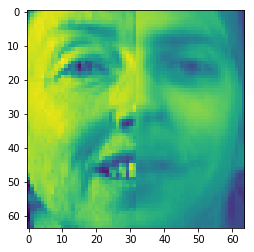

In [88]:
plt.imshow(np.hstack([sample[1],result[1]]))